In [3]:
import zdm
import os, sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from zdm import survey
from zdm import io
from zdm import iteration as it
from zdm.craco import loading


matplotlib.rcParams['image.interpolation'] = None

/opt/anaconda3/envs/frbenv/lib/python3.9/site-packages/FRB-0.1.dev0-py3.9.egg/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")
/var/folders/h1/kbzvqprx5p10xqkgz7w8g0880000gn/T/ipykernel_90171/3625334312.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['image.interpolation'] = None


In [30]:
defaultsize=14
ds=4
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : defaultsize}
matplotlib.rc('font', **font)

def main(p, survey, sv, ev, nv, nFRB=1000, iFRB=0, nz=500, ndm=1400, nbeams=5):

    """ Args
        p (str): parameter to vary
        survey (str): MC survey to load
        sv (int): start value to iterate from
        ev (int): end value to iterate to
        nv (int): number of pvalues to iterate over
        nFRB (int, optional): number of FRBs to analyze. defaults to 100.
        iFRB (int, optional): starting index for FRBs in MC survey.  defaults to 0
        ndm (int, optional): size of grid in DM.  defaults to 1400.
        nz (int, optional): size of grid in redshift. defaults to 500.
        nbeams (int, optional): number of bins for beamshape

    Returns

    pvalues (array): parameter range iterated over
    lls (array): total loglikelihood
    lcontr (array, [pvalues,4]): individual loglikelihood cotributions [p(z|DM), p(DM), p(DM|z), p(z)]
    """
    input_dict=io.process_jfile('Cubes/craco_full_cube.json')

    # deconstruct the input_dict
    state_dict, cube_dict, vparam_dict = it.parse_input_dict(input_dict)
    survey, grid = loading.survey_and_grid(survey_name=survey, state_dict=state_dict, NFRB=nFRB, iFRB=iFRB, lum_func=2, nz=nz, ndm=ndm, Nbeams=nbeams)

    # parameter to do gridding analysis on
    vparams = {}
    vparams[p] = None
    vparams['lC'] = -0.9

    lls_list=[]
    lcontr_list=[]

    # parameter values to iterate over    
    pvalues=np.linspace(sv, ev, nv)

    grids=[grid]
    surveys=[survey]

    for i in pvalues:
        vparams[p]=i
        grid.update(vparams)
        print(grid.state)

        llsum,lllist,NFRB,lcontr = it.calc_likelihoods_2D(grid, survey, norm=True,psnr=True, dolist=5)

        lcontr_list.append(lcontr)
        lls=lllist[0]+lllist[2]
        lls_list.append(lls)
        
    imx = np.nanargmax(lls_list)
    print(f"Max LL at {p}={pvalues[imx]}")


    return pvalues, lls_list, lcontr_list



In [21]:
pvalues, lls_default, lcontr_default= main(p="H0",survey="CRACO_alpha1_Planck18_Gamma",sv=55.0,ev=85.0,nv=12,nFRB=100,iFRB=100,nz=500,ndm=1400,nbeams=5)
pvalues, lls_low, lcontr_low= main(p="H0",survey="CRACO_alpha1_Planck18_Gamma",sv=55.0,ev=85.0,nv=12,nFRB=100,iFRB=100,nz=250,ndm=700,nbeams=5)
pvalues, lls_nbeam, lcontr_nbeam= main(p="H0",survey="CRACO_alpha1_Planck18_Gamma",sv=55.0,ev=85.0,nv=12,nFRB=100,iFRB=100,nz=500,ndm=1400,nbeams=30)
#pvalues, lls_h, lcontr_h= main(p="H0",survey="CRACO_std_May2022",sv=55.0,ev=85.0,nv=12,nFRB=1000,iFRB=0,nz=5000,ndm=14000,nbeams=5)
lls_high=np.array([-779.3120999489402, -772.9056015228355, -769.489441166127, -768.0507329174199, -767.9288047668712, -768.6856022345145, -770.0264446084614, -771.7505453226654, -773.7196297466046, -775.8377195961393, -778.0378293452067, -780.2730745172248])
#nz=5000 and ndm=14000 takes a long time to run - compute separately!
lls=[lls_default,lls_high,lls_low,lls_nbeam]

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid
{
    "FRBdemo": {
        "alpha_method": 1,
        "lC": -0.9,
        "sfr_n": 0.73,
        "source_evolution": 0
    },
    "IGM": {
        "F": 0.32
    },
    "MW": {
        "DMhalo": 50,
        "ISM": 35.0
    },
    "analysis": {
        "NewGrids": true,
        "sprefix": "Std"
    },
    "beam": {
        "Bmethod": 2,
        "Bthresh": 0
    },
    "cosmo": {
        "H0": 55.0,
        "Omega_b": 0.07410861756429751,
        "Omega_b_h2": 0.0224178568132,
        "Omega_k": 0.0,
        "Omega_lambda": 0.6888463055445441,
        "Omega_m": 0.30966,
        "fix_Omega_b_h2": true
    },
    "energy": {
        "alpha": 0.65,
        "gamma": -1.01,
        "lEmax": 41.4,
        "lEmin": 30,
        "luminosity_function": 2
    },
    "host": {
        "lmean": 2.18,
        "lsigma": 0.48
    },
    "scat": {
        "Sfnorm": 600,
      

/Users/esanmouli/zdm/zdm/iteration.py:555: RuntimeWarning: divide by zero encountered in log10
  Pll=np.log10(Pn)


{
    "FRBdemo": {
        "alpha_method": 1,
        "lC": -0.9,
        "sfr_n": 0.73,
        "source_evolution": 0
    },
    "IGM": {
        "F": 0.32
    },
    "MW": {
        "DMhalo": 50,
        "ISM": 35.0
    },
    "analysis": {
        "NewGrids": true,
        "sprefix": "Std"
    },
    "beam": {
        "Bmethod": 2,
        "Bthresh": 0
    },
    "cosmo": {
        "H0": 57.72727272727273,
        "Omega_b": 0.06727163926832909,
        "Omega_b_h2": 0.0224178568132,
        "Omega_k": 0.0,
        "Omega_lambda": 0.6888463055445441,
        "Omega_m": 0.30966,
        "fix_Omega_b_h2": true
    },
    "energy": {
        "alpha": 0.65,
        "gamma": -1.01,
        "lEmax": 41.4,
        "lEmin": 30,
        "luminosity_function": 2
    },
    "host": {
        "lmean": 2.18,
        "lsigma": 0.48
    },
    "scat": {
        "Sfnorm": 600,
        "Sfpower": -4.0,
        "Slogmean": 0.7,
        "Slogsigma": 1.9
    },
    "width": {
        "Wbins": 10,
     

lls_default=  66.50000000000017
lls_high=  64.80000000000014
lls_low=  67.50000000000017
lls_nbeam=  66.40000000000016


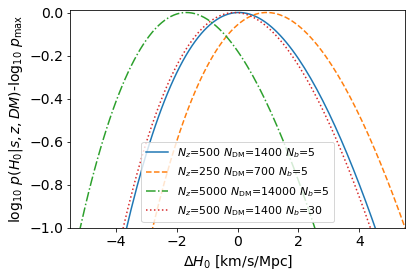

In [25]:
from scipy import interpolate

lls_default,lls_high, lls_low, lls_nbeam = lls[0], lls[1], lls[2], lls[3]

H0new=np.arange(55.0,80.0,0.1)
lls_ip=[]
for i,ll in enumerate(lls):
    tckj = interpolate.splrep(pvalues,ll, s=0)
    lls_ip_i = interpolate.splev(H0new, tckj)
    lls_ip.append(lls_ip_i)

lls_default,lls_high, lls_low, lls_nbeam = lls_ip[0], lls_ip[1], lls_ip[2], lls_ip[3]

print ("best fit for lls_default= ",H0new[np.argmax(lls_default)])
print ("best fit for lls_high= ",H0new[np.argmax(lls_high)])
print ("best fit for lls_low= ",H0new[np.argmax(lls_low)])
print ("best fit for lls_nbeam= ",H0new[np.argmax(lls_nbeam)])

lls_default = lls_default - max(lls_default)
lls_low = lls_low - max(lls_low)
lls_nbeam =lls_nbeam - max(lls_nbeam)
lls_high = lls_high - max(lls_high)

H0new_p=H0new-H0new[np.argmax(lls_default)]
plt.plot(H0new_p,lls_default, label= "$N_z$=500 $N_{\mathrm{DM}}$=1400 $N_b$=5", ls='-')
plt.plot(H0new_p,lls_low, label= "$N_z$=250 $N_{\mathrm{DM}}$=700 $N_b$=5", ls='--')
plt.plot(H0new_p,lls_high, label= "$N_z$=5000 $N_{\mathrm{DM}}$=14000 $N_b$=5", ls='-.')
plt.plot(H0new_p,lls_nbeam, label= "$N_z$=500 $N_{\mathrm{DM}}$=1400 $N_b$=30",ls=':')
plt.legend(prop={'size': 11}, loc=8)
plt.xlim(-5.5,5.5)
plt.ylim(-1,0.01)
plt.xlabel("$\Delta H_0$ [km/s/Mpc]")
plt.ylabel("$\log_{10}$ $p(H_0|s,z,DM)$-$\log_{10}$ $p_{\mathrm{max}}$")
#plt.grid()

plt.show()

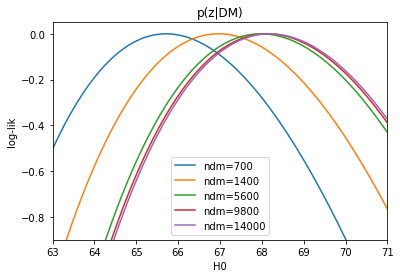

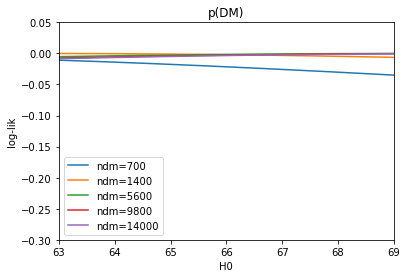

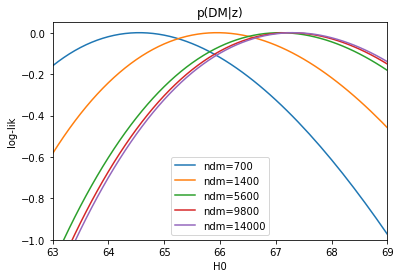

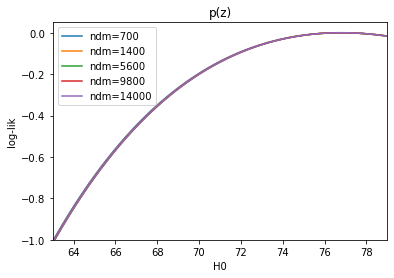

In [26]:
#check individual contributions to loglikelihood [p(z|DM), p(DM), p(DM|z), p(z)] when changing ndm
from scipy import interpolate

grid_lls=[]
pvalues=np.linspace(55,80,12)
grid_lls_contr=[]
ndm=np.array([700,1400,5600,9800,14000])
for n in ndm:
    pvalues, lls, lcontr= main(p="H0",survey="CRACO_alpha1_Planck18_Gamma",sv=55.0,ev=80.0,nv=12,nFRB=100,iFRB=100,nz=500,ndm=n,nbeams=5)
    grid_lls.append(lls)
    grid_lls_contr.append(lcontr)

grid_lls_spline=[]
grid_lls_contr_spline=[]
H0new=np.arange(55.0,80.0,0.1)
label_contr=["p(z|DM)", "p(DM)", "p(DM|z)", "p(z)"]
labels=["ndm=700","ndm=1400","ndm=5600","ndm=9800","ndm=14000"]
xlims=[(63,71),(63,69),(63,69),(63,79)]
ylims=[(-0.9,0.05),(-0.3,0.05),(-1,0.05),(-1,0.05)]
grid_lls_contr_t=np.transpose(grid_lls_contr)

for i in range(0,len(grid_lls_contr_t)):
    contr=grid_lls_contr_t[i]
    #print(np.shape(contr))
    for j in range (len(ndm)):
        contr_j=np.transpose(contr)
        #print(np.shape(contr_j))
        tckj = interpolate.splrep(pvalues,contr_j[j], s=0)
        ynewj = interpolate.splev(H0new, tckj)
        ynewj_p=ynewj-max(ynewj)
        
        plt.plot(H0new,ynewj_p, label=labels[j])
        
    plt.xlabel("H0")
    plt.ylabel("log-lik")
    plt.title(label_contr[i])
    plt.xlim(xlims[i])
    plt.ylim(ylims[i])
    plt.legend()
    plt.show()
    


